# 일대다 병합
- 일대다 병합 예시
    - 왼쪽 데이터 테이블 : 병합 기준 열에 대해 중복된 값 없음 + 왼쪽에만 있는 병합 기준 값 있음
    - 오른쪽 데이터 테이블 : 병합 기준 열에 대해 중복된 값 있음 + 누락된 병합 기준 값 있음
>이때 어떤 조인을 사용하는지 중요하며, 결과를 상상해보아야 한다

- **내부 조인** 시, 양쪽 모두에 있는 값에 대해서만 조인되며 
> 그 중 오른쪽에 n번의 중복이 있는 값에 대해서는 특히,  
> 왼쪽 데이터 정보는 동일한채 & 오른쪽 데이터는 정보가 있는 행만큼 매칭되어 n번 반복됨
- **왼쪽 조인** 시, 내부 조인의 반환 결과뿐만 아니라, 
> 왼쪽 데이터에만 존재하는 병합 기준 값 각각에 대해 한 행씩 반환되고,   
> 오른쪽 데이터에만 존재하는 병합 기준 값에 대해서는 결과에서 누락됨
- 데이터 병합하기 전 알아둬야 할 점🧐
    - 1) 어느 열을 병합 기준 열로 삼는게 타당?
    - 2) 어떤 종류의 조인을 사용할지? 그 이유는?
    - 3) 양쪽 데이터 테이블에 행(row)이 몇개씩 있는지?
    - 4) "조인 유형" / "중복값 여부(각 데이터 테이블의 행(row) 수)" / "병합 기준 값의 개수"를 토대로 몇 개의 행(row)이 유지될지 예상해야함  
    
- [참고]
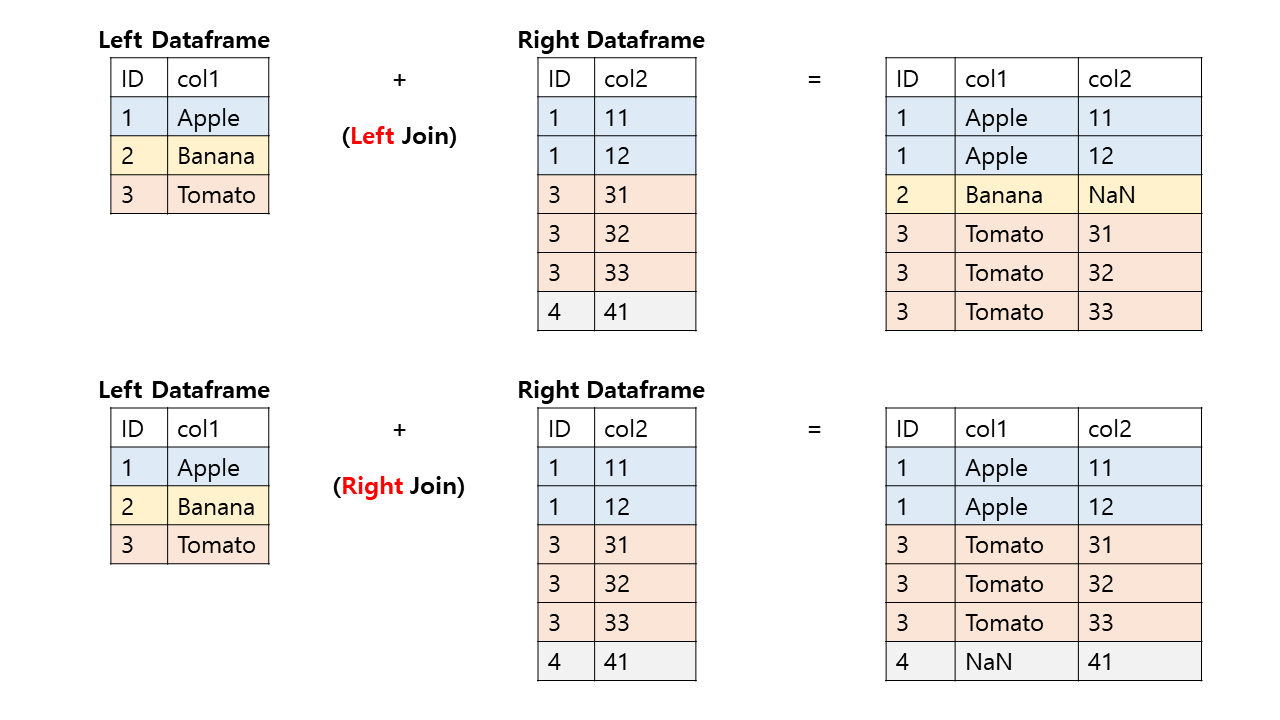

## 환경 세팅

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 120)
pd.options.display.float_format = '{:,.2f}'.format

## 데이터 로드 : CMA collection data
- 왼쪽 데이터에만 존재하는 병합 기준 값 있음( = 오른쪽 데이터에 누락된 병합 기준 값 있음)
- 왼쪽 데이터에는 중복 값 없으며, 오른쪽 데이터에는 중복된 값 있음

In [10]:
cmaCitations = pd.read_csv('data/cmacitations.csv')
cmaCreators = pd.read_csv('data/cmacreators.csv')

### look at the citations data
cmaCitations.head(10)

,id,citation
0,92937,"Milliken, William M. ""The Second Exhibition of..."
1,92937,"Glasier, Jessie C. ""Museum Gets Prize-Winning ..."
2,92937,"""Cleveland Museum Acquires Typical Pictures by..."
3,92937,"Milliken, William M. ""Two Examples of Modern P..."
4,92937,<em>Memorial Exhibition of the Work of George ...
5,92937,The Cleveland Museum of Art. <em>Handbook of t...
6,92937,"Cortissoz, Royal. ""Paintings and Prints by Geo..."
7,92937,"Isham, Samuel, and Royal Cortissoz. <em>The Hi..."
8,92937,"Mather, Frank Jewett, Charles Rufus Morey, and..."
9,92937,"""Un Artiste Americain."" <em>L'illustration.</e..."


In [11]:
cmaCitations.shape, cmaCitations.id.nunique()

((11642, 2), 935)

In [12]:
### look at the creators data
cmaCreators.head(10)

,id,creator,title,birth_year,death_year,collection,type,creation_date
0,92937,"George Bellows (American, 1882-1925)",Stag at Sharkey's,1882,1925,American - Painting,Painting,1909
1,94979,"John Singleton Copley (American, 1738-1815)",Nathaniel Hurd,1738,1815,American - Painting,Painting,c. 1765
2,137259,"Gustave Courbet (French, 1819-1877)",Mme L... (Laure Borreau),1819,1877,Mod Euro - Painting 1800-1960,Painting,1863
3,141639,"Frederic Edwin Church (American, 1826-1900)",Twilight in the Wilderness,1826,1900,American - Painting,Painting,1860
4,93014,"Thomas Cole (American, 1801-1848)","View of Schroon Mountain, Essex County, New Yo...",1801,1848,American - Painting,Painting,1838
5,110180,"Albert Pinkham Ryder (American, 1847-1917)",The Race Track (Death on a Pale Horse),1847,1917,American - Painting,Painting,c. 1896-1908
6,135299,"Vincent van Gogh (Dutch, 1853-1890)",Adeline Ravoux,1853,1890,Mod Euro - Painting 1800-1960,Painting,1890
7,125249,"Vincent van Gogh (Dutch, 1853-1890)",The Large Plane Trees (Road Menders at Saint-R...,1853,1890,Mod Euro - Painting 1800-1960,Painting,1889
8,126769,"Henri Rousseau (French, 1844-1910)",Fight between a Tiger and a Buffalo,1844,1910,Mod Euro - Painting 1800-1960,Painting,1908
9,135382,"Claude Monet (French, 1840-1926)",The Red Kerchief,1840,1926,Mod Euro - Painting 1800-1960,Painting,c. 1868–73


In [13]:
cmaCreators.shape, cmaCreators.id.nunique()

((737, 8), 654)

In [13]:
### look at the partial data of the creators data
cmaCreators.loc[:,['id','creator','birth_year']].head(10)

,id,creator,birth_year
0,92937,"George Bellows (American, 1882-1925)",1882
1,94979,"John Singleton Copley (American, 1738-1815)",1738
2,137259,"Gustave Courbet (French, 1819-1877)",1819
3,141639,"Frederic Edwin Church (American, 1826-1900)",1826
4,93014,"Thomas Cole (American, 1801-1848)",1801
5,110180,"Albert Pinkham Ryder (American, 1847-1917)",1847
6,135299,"Vincent van Gogh (Dutch, 1853-1890)",1853
7,125249,"Vincent van Gogh (Dutch, 1853-1890)",1853
8,126769,"Henri Rousseau (French, 1844-1910)",1844
9,135382,"Claude Monet (French, 1840-1926)",1840


## 병합 기준 검토

In [31]:
##################### show duplications of merge-by values for citations.
cmacitations.id.value_counts().sort_index().head(10)
# [동일 코드 ] = cmacitation['id'].value_counts().head(10)
# [응용] cmacitation[['id','citation']].value_counts().head(10)

78982     2
84662     8
85239     1
88940     8
90249     9
92844     6
92936    20
92937    98
93014    79
93160     1
Name: id, dtype: int64

In [32]:
##################### show duplications of merge-by values for creators.
cmacreators.id.value_counts().sort_index().head(10)

78982    1
84662    1
85239    1
88940    1
92844    1
92936    1
92937    1
93014    1
93160    1
93173    3
Name: id, dtype: int64

In [34]:
##################### check the merge
def checkmerge(dfleft, dfright, idvar):
    dfleft['in_left'] = 'Y'
    dfright['in_right'] = 'Y'
    dfboth = pd.merge(dfleft[[idvar, 'in_left']], dfright[[idvar, 'in_right']], on=[idvar], how='outer')
    dfboth.fillna('N', inplace=True)
    print(pd.crosstab(dfboth.in_left, dfboth.in_right))

checkmerge(cmacitations.copy(), cmacreators.copy(), 'id')

in_right     N     Y
in_left             
N            0    46
Y         2579  9701


In [ ]:
# show a merge-by column duplicated in both data frames
cmacitations.loc[cmacitations.id==124733]
cmacreators.loc[cmacreators.id==124733, ['id','creator','birth_year','title']]

# do a many-to-many merge
cma = pd.merge(cmacitations, cmacreators, on=['id'], how="outer")
cma['citation'] = cma.citation.str[0:20]
cma['creator'] = cma.creator.str[0:20]
cma.loc[cma.id==124733, ['citation','creator','birth_year']]



# 다대다 병합
* 다대다 병합 : 병합 기준 값이 왼쪽, 오른쪽 모두에서 중복일 때 사용하는 병합  
1) 그러나, 위와 같은 경우여도 '다대다 병합'을 해야하는 경우는 드묾 / 그 대신 오히려 '일대다 관계'를 복원하는 게 우선일 수가 있음
2) 다대다 병합이 불가피한 경우도 있음 => 중복이 발생하는 것에 상관없이 전체 데이터를 포함해야하는 경우.. 

In [2]:
import pandas as pd
import os
print(os.listdir('data'))

['cmacitations.csv', 'cmacitations.pkl', 'cmacreators.csv', 'cmacreators.pkl', 'ghcn', 'ltcountries.csv', 'ltcountries.pkl', 'ltcountry', 'ltlocations.csv', 'ltlocations.pkl', 'nls97add.csv', 'nls97add.pkl', 'nls97colenr.csv', 'nls97colenr.pkl', 'nls97f.csv', 'nls97f.pkl', 'nls97weeksworked.csv', 'nls97weeksworked.pkl']


In [4]:
cmacitations = pd.read_csv('data/cmacitations.csv') # 클리블랜드 미술관 소장품별 매체 인용 
cmacreators = pd.read_csv('data/cmacreators.csv') # 클리블랜드 미술관 소장품별 작가 정보

## 데이터 살펴보기

In [6]:
cmacitations.head(10)

,id,citation
0,92937,"Milliken, William M. ""The Second Exhibition of..."
1,92937,"Glasier, Jessie C. ""Museum Gets Prize-Winning ..."
2,92937,"""Cleveland Museum Acquires Typical Pictures by..."
3,92937,"Milliken, William M. ""Two Examples of Modern P..."
4,92937,<em>Memorial Exhibition of the Work of George ...
5,92937,The Cleveland Museum of Art. <em>Handbook of t...
6,92937,"Cortissoz, Royal. ""Paintings and Prints by Geo..."
7,92937,"Isham, Samuel, and Royal Cortissoz. <em>The Hi..."
8,92937,"Mather, Frank Jewett, Charles Rufus Morey, and..."
9,92937,"""Un Artiste Americain."" <em>L'illustration.</e..."


In [7]:
cmacitations.shape

(11642, 2)

In [8]:
cmacitations.id.nunique()

935

In [11]:
cmacreators.columns

Index(['id', 'creator', 'title', 'birth_year', 'death_year', 'collection',
       'type', 'creation_date'],
      dtype='object')

In [13]:
cmacreators.loc[:,['id','creator','birth_year']].head(10)

,id,creator,birth_year
0,92937,"George Bellows (American, 1882-1925)",1882
1,94979,"John Singleton Copley (American, 1738-1815)",1738
2,137259,"Gustave Courbet (French, 1819-1877)",1819
3,141639,"Frederic Edwin Church (American, 1826-1900)",1826
4,93014,"Thomas Cole (American, 1801-1848)",1801
5,110180,"Albert Pinkham Ryder (American, 1847-1917)",1847
6,135299,"Vincent van Gogh (Dutch, 1853-1890)",1853
7,125249,"Vincent van Gogh (Dutch, 1853-1890)",1853
8,126769,"Henri Rousseau (French, 1844-1910)",1844
9,135382,"Claude Monet (French, 1840-1926)",1840


In [17]:
cmacitations.id.value_counts().head(10)
##### citations 데이터에서 '병합 기준 값'의  중복을 보임 - 예. 소장품 148758에 대해 174회의 인용이 발생

148758    174
122351    116
92937      98
123168     94
149112     93
94979      93
124245     87
128842     86
102578     84
93014      79
Name: id, dtype: int64

In [20]:
cmacreators.id.value_counts().head(10)
# -> creators 데이터에서도 '병합 기준 값'이 중복을 보임 - 예. 소장품 149386에 대해 4번의 작가 정보가 발생

149386    4
140001    4
140427    3
146797    3
93173     3
146795    3
142752    3
114537    3
149041    3
114538    3
Name: id, dtype: int64

## 병합 확인

In [28]:
### dfleft  : 왼쪽 데이터프레임 
### dfright : 오른쪽 데이터프레임
### idvar   : 병합 기준 열
def checkmerge(dfleft, dfright, idvar):
    dfleft['inleft'] = 'Y'
    dfright['inright'] = 'Y'
    dfboth = pd.merge(dfleft[[idvar, 'inleft']], dfright[[idvar, 'inright']],\
                      on=[idvar], how='outer')
    dfboth.fillna('N', inplace=True)
    print(pd.crosstab(dfboth.inleft, dfboth.inright))

checkmerge(cmacitations, cmacreators, 'id')

inright     N     Y
inleft             
N           0    46
Y        2579  9701


## 양쪽 중복 값 보이기

In [30]:
cmacitations.loc[cmacitations.id==124733,:] ### 특정 소장품에 대한 14회의 인용

,id,citation,inleft
8963,124733,"Weigel, J. A. G. <em>Catalog einer Sammlung vo...",Y
8964,124733,"Winkler, Friedrich. <em>Die Zeichnungen Albrec...",Y
8965,124733,"Francis, Henry S. ""Drawing of a Dead Blue Jay ...",Y
8966,124733,"Kurz, Otto. <em>Fakes: A Handbook for Collecto...",Y
8967,124733,Minneapolis Institute of Arts. <em>Watercolors...,Y
8968,124733,"Pilz, Kurt. ""Hans Hoffmann: Ein Nürnberger Dür...",Y
8969,124733,"Koschatzky, Walter and Alice Strobl. <em>Düre...",Y
8970,124733,"Johnson, Mark M<em>. Idea to Image: Preparator...",Y
8971,124733,"Kaufmann, Thomas DaCosta. <em>Drawings from th...",Y
8972,124733,"Koreny, Fritz. <em>Albrecht Dürer and the ani...",Y


In [31]:
cmacreators.loc[cmacreators.id==124733, ['id','creator','birth_year','title']] ### 특정 소장품에 대한 2명의 작가

,id,creator,birth_year,title
449,124733,"Albrecht Dürer (German, 1471-1528)",1471,Dead Blue Roller
450,124733,"Hans Hoffmann (German, 1545/50-1591/92)",1545/50,Dead Blue Roller


## 다대다 병합 실행

In [36]:
cma = pd.merge(cmacitations, cmacreators, on=['id'], how='outer')
cma['citation'] = cma.citation.str[0:20]
cma['creator'] = cma.creator.str[0:20]
cma.loc[cma.id==124733, ['citation','creator','birth_year']].shape ### 특정 소장품에 대한 작가별 인용이 총 28회

,citation,creator,birth_year
9457,"Weigel, J. A. G. <em",Albrecht Dürer (Germ,1471
9458,"Weigel, J. A. G. <em",Hans Hoffmann (Germa,1545/50
9459,"Winkler, Friedrich.",Albrecht Dürer (Germ,1471
9460,"Winkler, Friedrich.",Hans Hoffmann (Germa,1545/50
9461,"Francis, Henry S. ""D",Albrecht Dürer (Germ,1471
9462,"Francis, Henry S. ""D",Hans Hoffmann (Germa,1545/50
9463,"Kurz, Otto. <em>Fake",Albrecht Dürer (Germ,1471
9464,"Kurz, Otto. <em>Fake",Hans Hoffmann (Germa,1545/50
9465,Minneapolis Institut,Albrecht Dürer (Germ,1471
9466,Minneapolis Institut,Hans Hoffmann (Germa,1545/50


In [37]:
cma.loc[cma.id==124733, ['citation','creator','birth_year']].shape

(28, 3)

In [39]:
cmacreators.creator.nunique()

475

# 병합 루틴